#### Lead Scoring Case Study

#### Goal 

There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### Importing Libraries and Reading the Dataset

In [5]:
# Supress Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Importing Numpy and Pandas 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Importing the dataset 
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Inspection 

In [9]:
# Shape of the data 
lead_data.shape

(9240, 37)

In [10]:
# Comment : We have 9240 rows and 37 columns in our Dataset

In [11]:
# Let's check the different columns in the dataset
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# Let's check the null count and datatypes of the variables 
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# All the datatypes of the variables are in correct format

In [14]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
# Comment : It's clear from the counts that we have missing values present in our dataset. 

#### Data Cleaning

1. Handling the 'Select' Level which is present in many of the categorical variables
2. It's clear that there are 'Select' values in many columns. It may be because the customers did not share the information which was given, and 'Select' is being displayed for such cases. We can convert them into NULL. 

In [18]:
# Coverting 'Select' values to NaN

In [19]:
lead_data = lead_data.replace('Select', np.nan)

In [20]:
# Checking for null values 
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [21]:
#let's check the percentage of null values in each column

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We have some columns with high percentage of missing values. We can drop the columns with missing values greated than 40%

In [23]:
# dropping the columns with missing value greated than or equal to 40%
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index',
                                  'Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [24]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

1) Column: 'Specialization'
   - This column has 37% missing values 

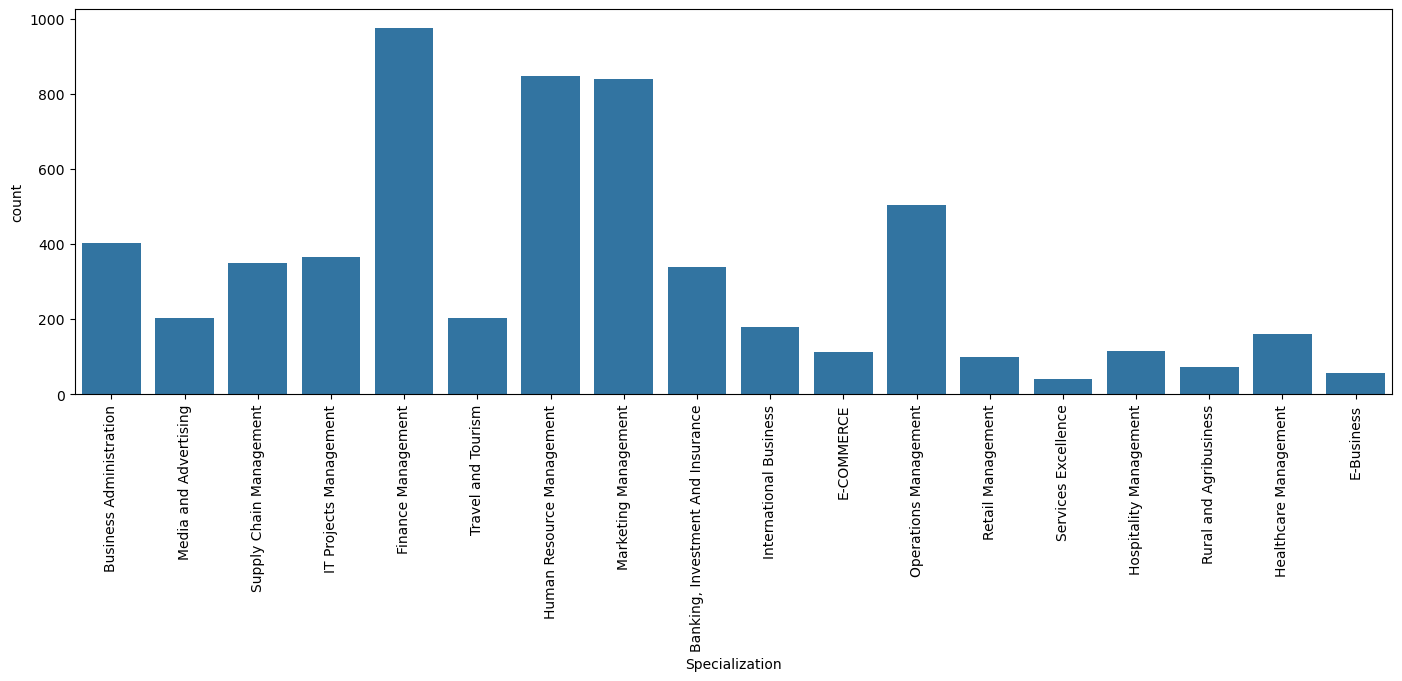

In [26]:
plt.figure(figsize=(17, 5))
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation=90)
plt.show()

There are 37% missing values present in the Specialization column. It may be due to the following reasons :
    - Specialization missing in options 
    - Lead is Student
    - Lead not having any specialization 

In [28]:
# We can create a separate cateogry for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

In [29]:
lead_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


2) Tags Column
   - 'Tags' column has 36% missing values 

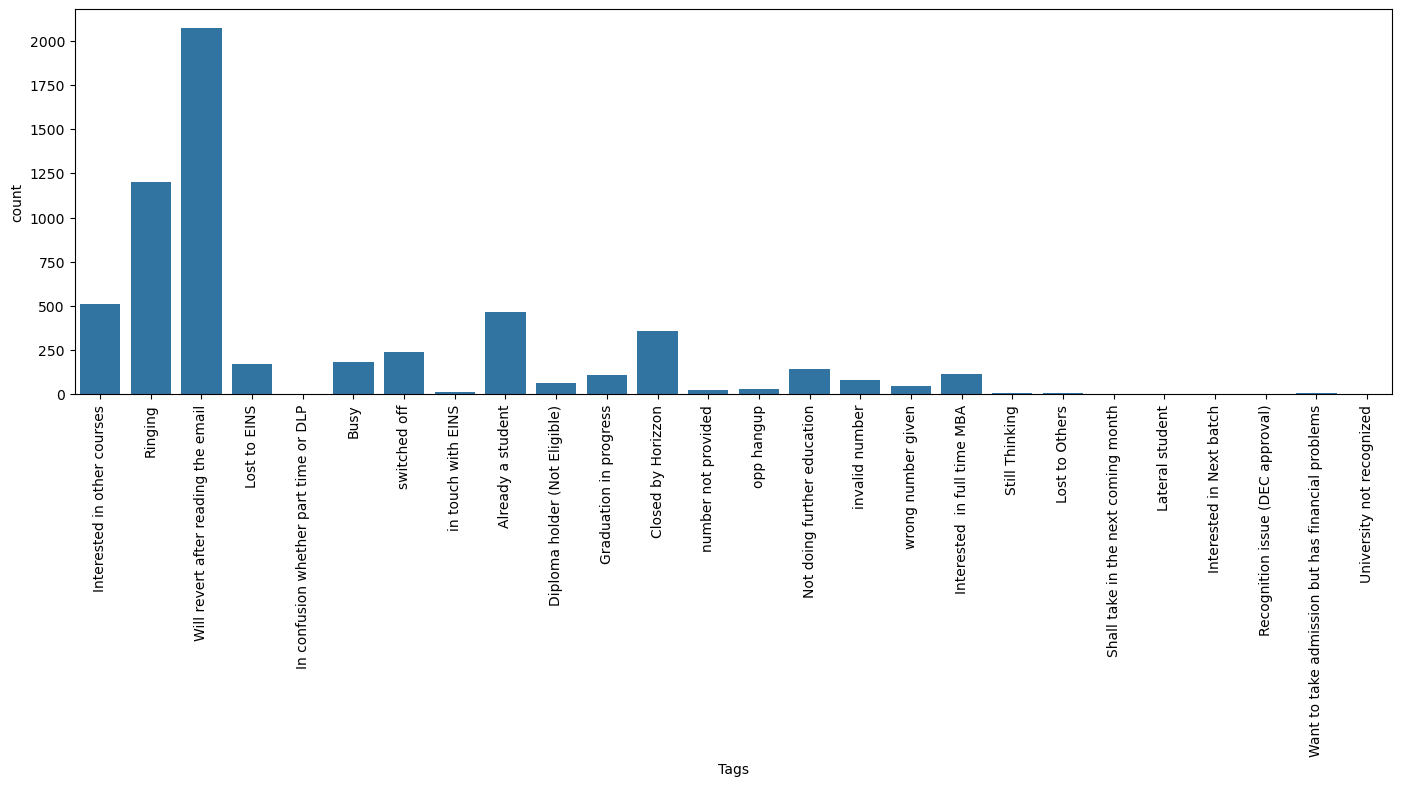

In [31]:
plt.figure(figsize=(17, 5))
sns.countplot(x='Tags', data=lead_data)
plt.xticks(rotation=90)
plt.show()

It's clear that most of the values are 'Will revert after reading the email', we can impute missing values in this column with this value

In [33]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

3) Column: 'What matters most to you in choosing a course'
   - this column has 29% missing values 

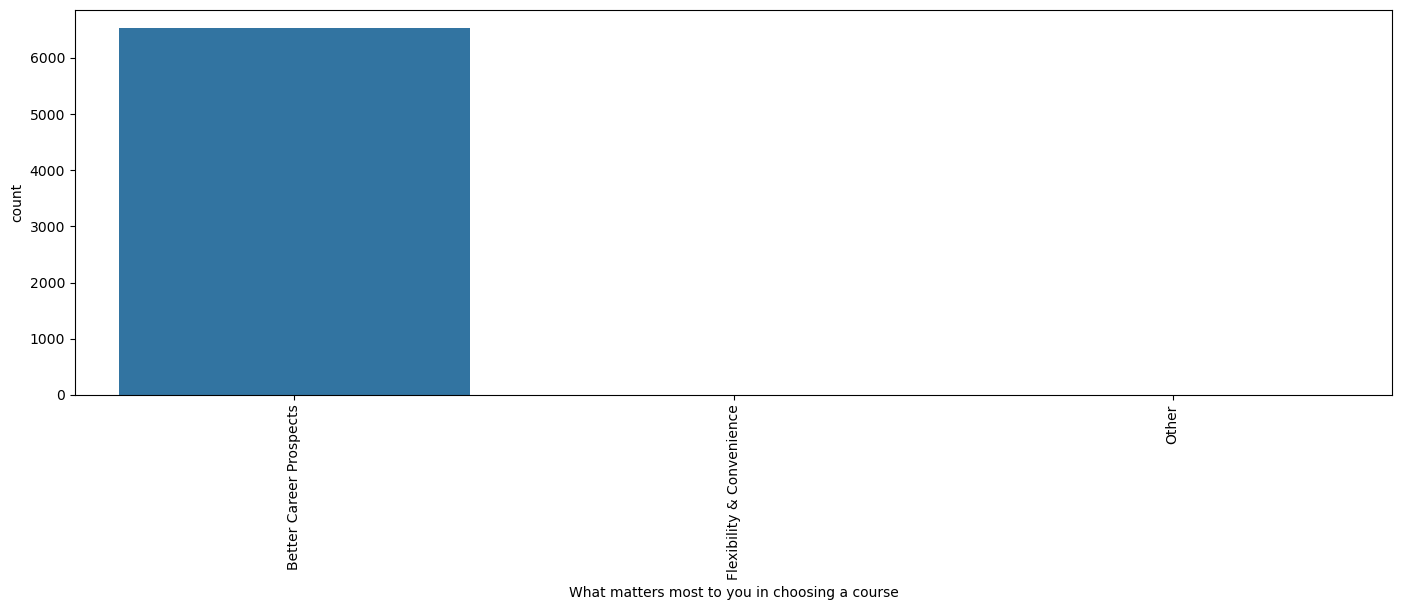

In [35]:
plt.figure(figsize=(17, 5))
sns.countplot(x='What matters most to you in choosing a course', data=lead_data)
plt.xticks(rotation=90)
plt.show()

In [36]:
# Let's find the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

It's clear that this is highly skewed column which will result in biasedness, we can remove this columns 

In [38]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

In [39]:
# Let's check the missing values 
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

4) Column: 'What is your current occupation'
   - this column has 29% missing values 

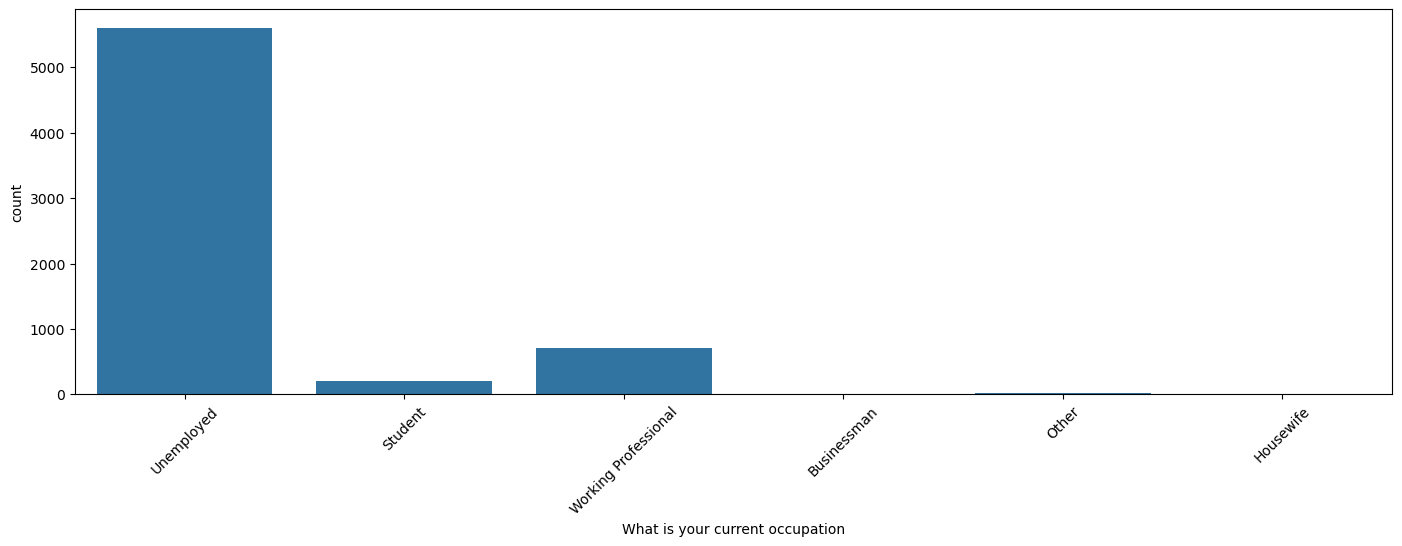

In [41]:
plt.figure(figsize=(17, 5))
sns.countplot(x='What is your current occupation', data=lead_data)
plt.xticks(rotation=45)
plt.show()

In [42]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

In [43]:
# It's clear that most values are 'Unemployed', we can impute missing values in this column with this value

In [44]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

5) Column:'Country'
   - This column has 27% missing values 

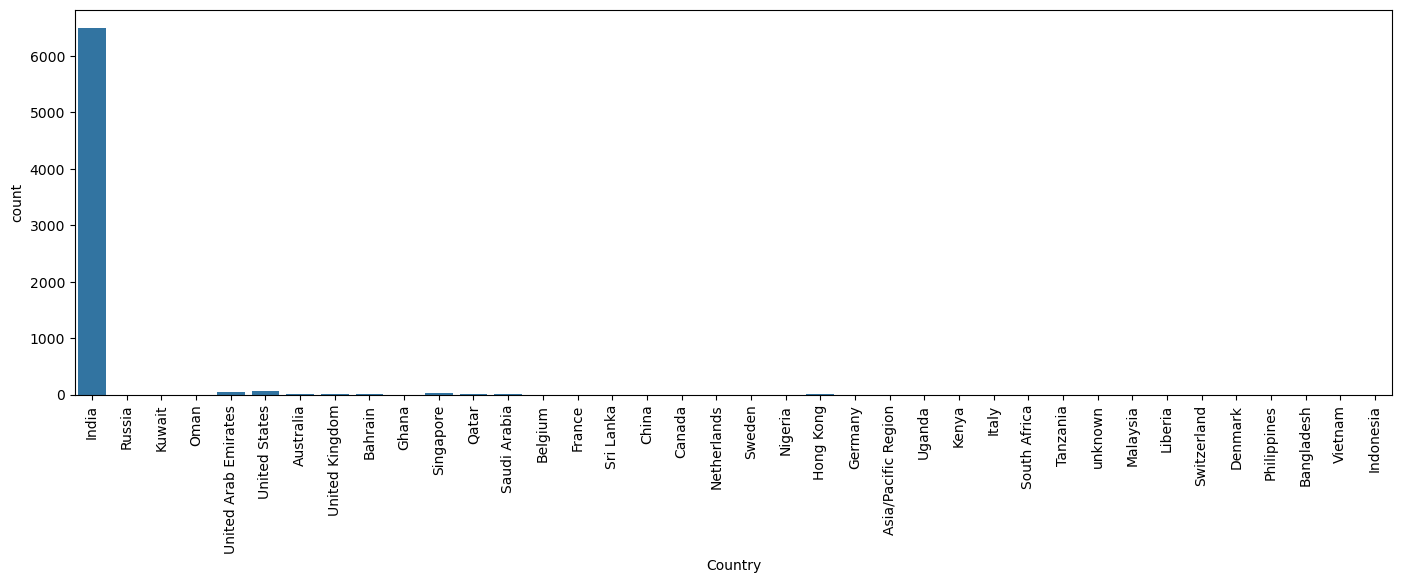

In [46]:
plt.figure(figsize=(17, 5))
sns.countplot(x='Country', data=lead_data)
plt.xticks(rotation=90)
plt.show()

It's clear that this column is highly skewed but contains important information regarding the leads. Since most values are 'India', we can 
impute missing values in this column with this value.

In [48]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

6) Columns: 'City'
    - This column has% missing values 

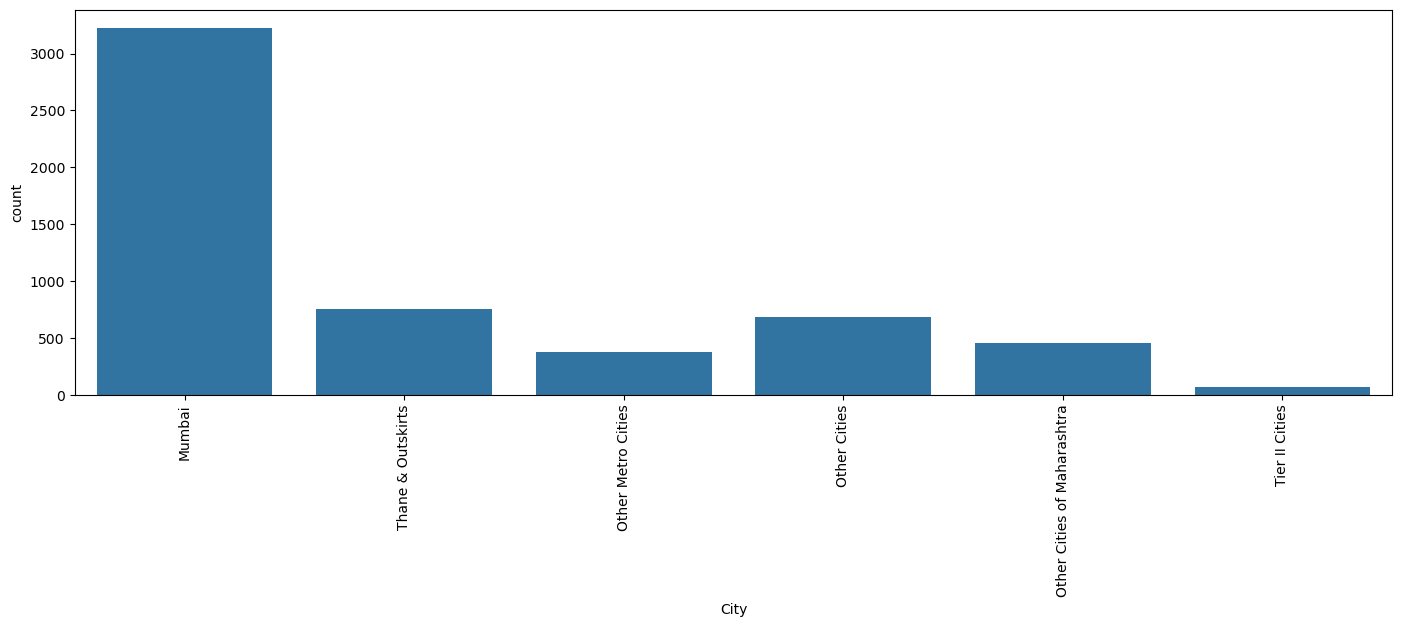

In [50]:
plt.figure(figsize=(17, 5))
sns.countplot(x='City', data=lead_data)
plt.xticks(rotation=90)
plt.show()

In [51]:
# Let's calculate the percentage of different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

City
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

It's clear that most occuring value is Mumbai. We can impute missing values in this column with Mode('Mumbai')

In [53]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumabi')

In [54]:
# Let's calculate the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Major portion of missing values is taken care. Rest missing values are under 2%, let's drop them.

In [56]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [57]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now there is no ore missing values in the dataset.

In [59]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

98.2034632034632

#### Exploratory Data Analysis 

Let's check for duplicates: 

In [62]:
lead_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Length: 9074, dtype: bool

In [63]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### Univariate Analysis and Bivariate Anlysis 

1) Converted

Converted is the target variable. indicates whether a lead has been successfully converted 1) or not (0)

In [67]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumabi,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumabi,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [68]:
Converted = lead_data['Converted'].mean() * 100
Converted

37.85541106458012

The lead conversion rate stands at 38%

2) Lead Origin 

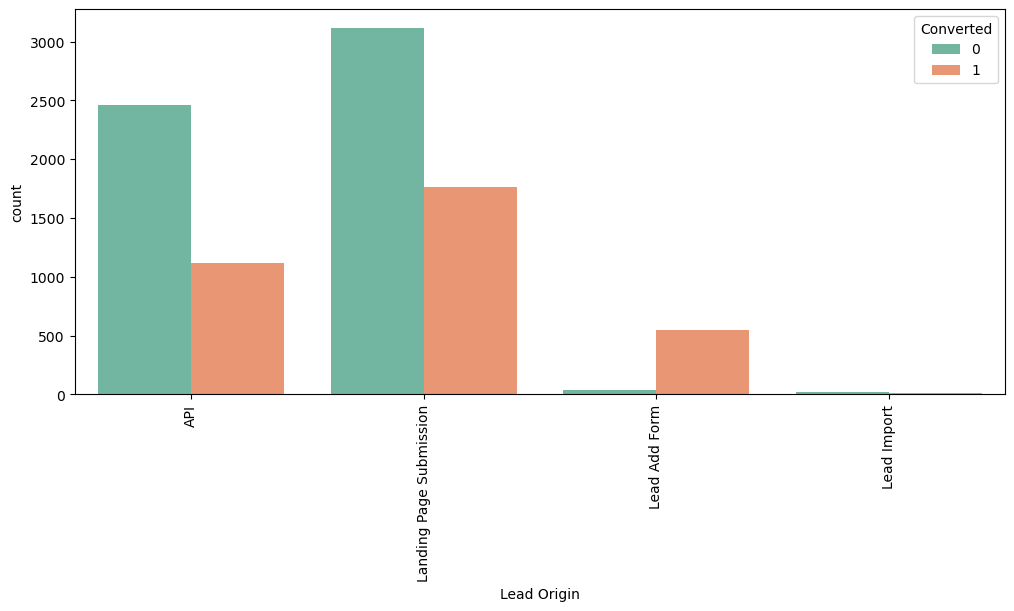

In [71]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Lead Origin', hue='Converted', data=lead_data, palette='Set2')
plt.xticks(rotation=90)
plt.show()

Conclusion : 
    1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.    2. 
Lead Add Form has more than 90% conversion rate but count of lead are not very high.    3. 
LeaI Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

3) Lead Source 

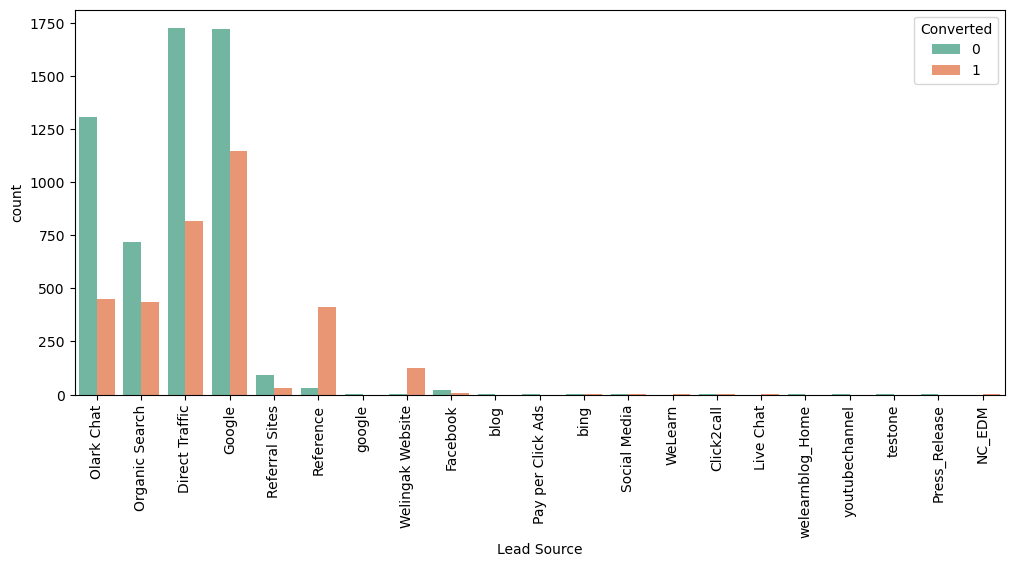

In [75]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Lead Source', hue='Converted', data=lead_data, palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [76]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [77]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

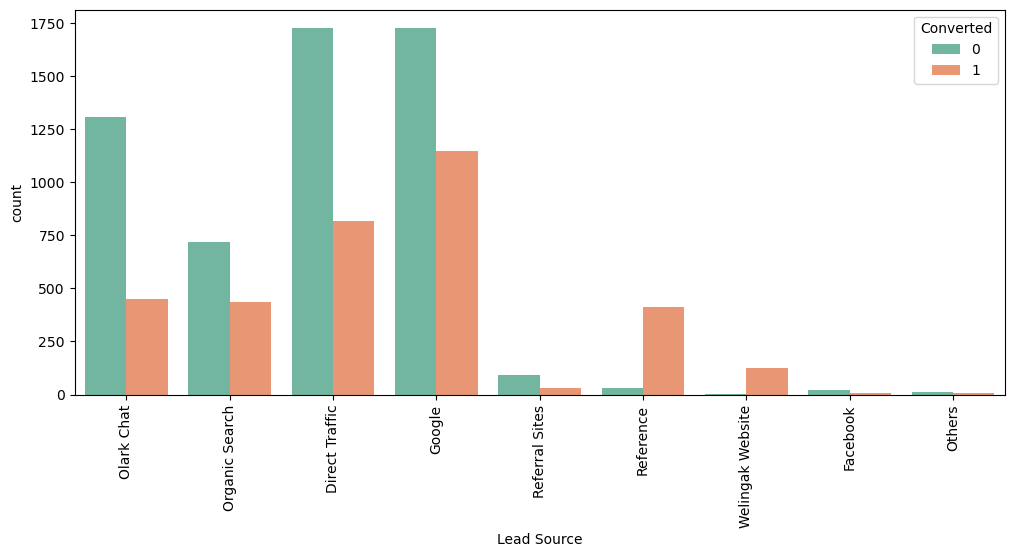

In [78]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Lead Source', hue='Converted', data=lead_data, palette='Set2')
plt.xticks(rotation=90)
plt.show()

Inference
    1. Google and Direct traffic generates maximum number of leads.
    2. Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, 
direct traffic, and google leads and generate more leads from reference and welingak website.

4) Do not Email 

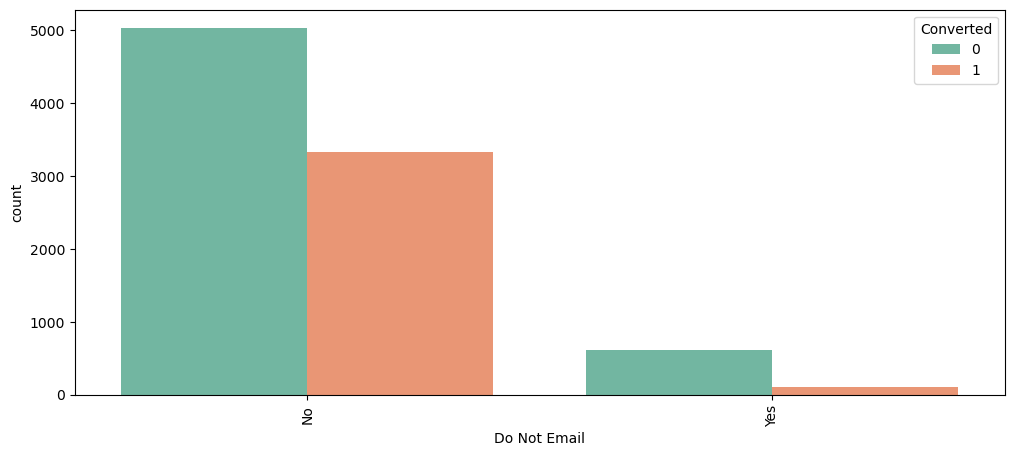

In [82]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Do Not Email', hue='Converted', data=lead_data, palette='Set2')
plt.xticks(rotation=90)
plt.show()

Conclusion : 
    - Most enteries are 'Np'. No inference can be drawn with this parameter.

5) Do Not Call 

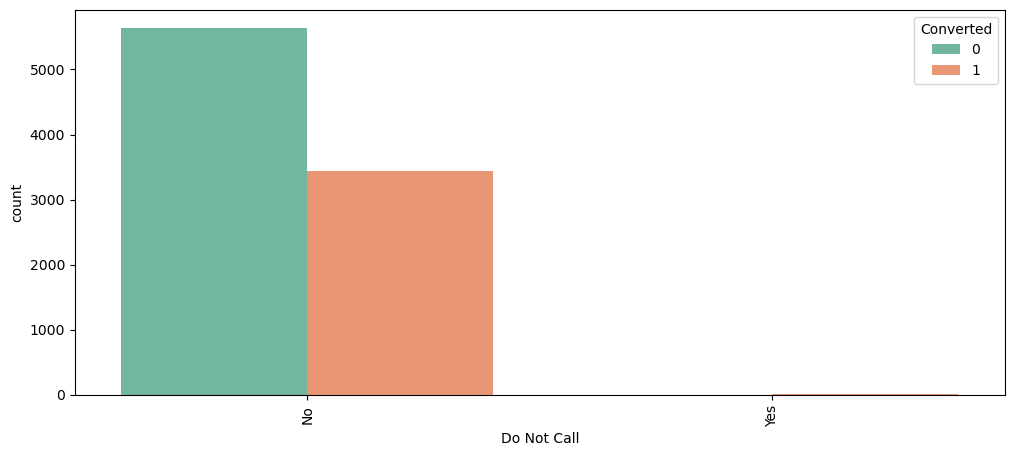

In [85]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Do Not Call', hue='Converted', data=lead_data, palette='Set2')
plt.xticks(rotation=90)
plt.show()

6) TotalVisits

In [87]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

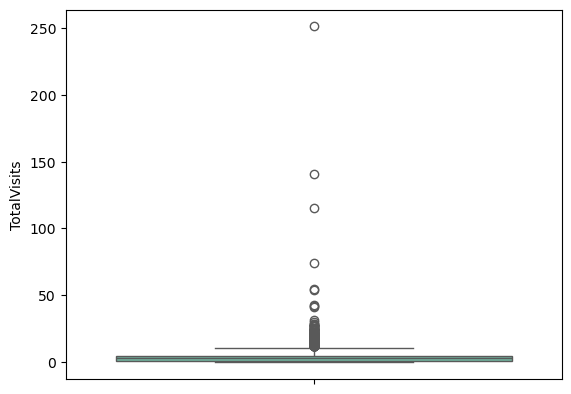

In [88]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set2')

It's clear that there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [90]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

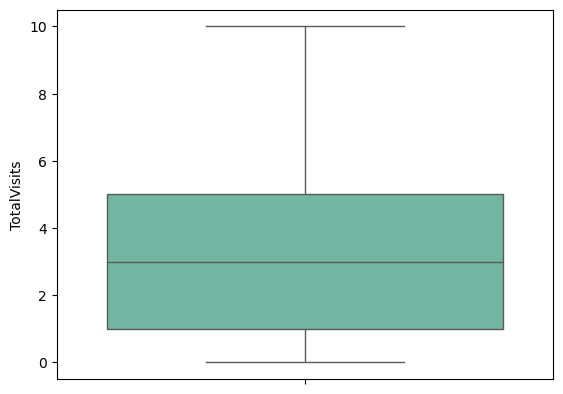

In [91]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set2')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

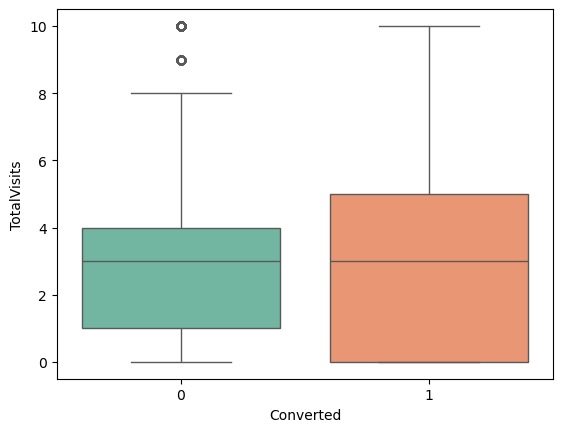

In [92]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set2')

Inference
    - Median for converted and not converted leads are the same.
    - Nothing can be concluded on the basis of Total Visits.

7) Total Time Spent on Website 

In [95]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

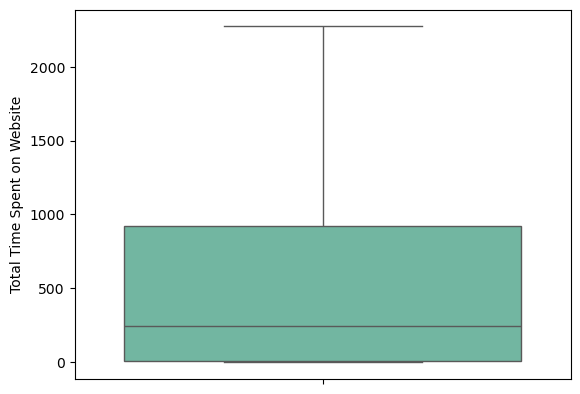

In [96]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set2')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

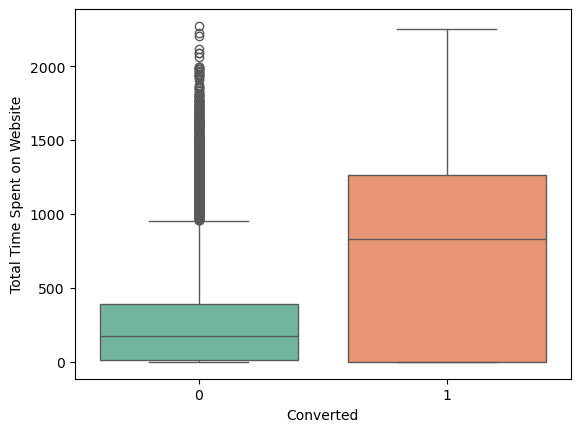

In [97]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set2')

Inference
    - Leads spending more time on the weblise are more likely to be converted.

#### Website should be made more engaging to make leads spend more time.

8) Page Views Per Visit 

In [101]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

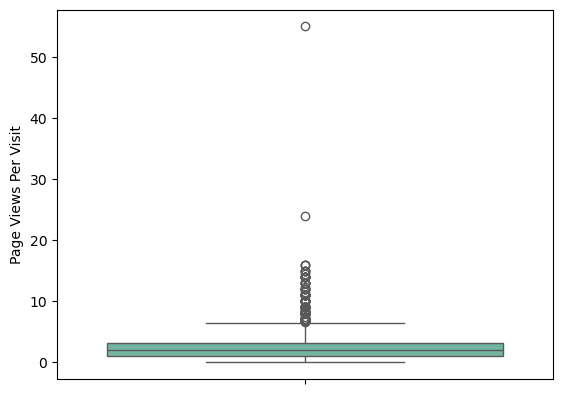

In [102]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set2')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [104]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

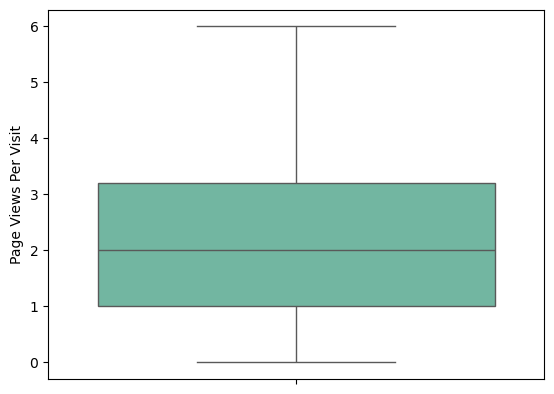

In [105]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set2',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

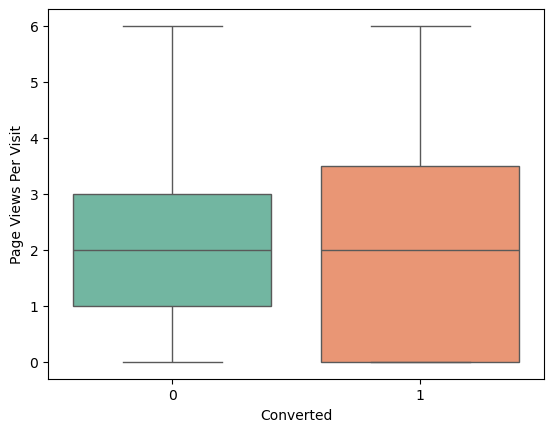

In [106]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set2')

Inference
 - Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

9) Last Activity

In [110]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

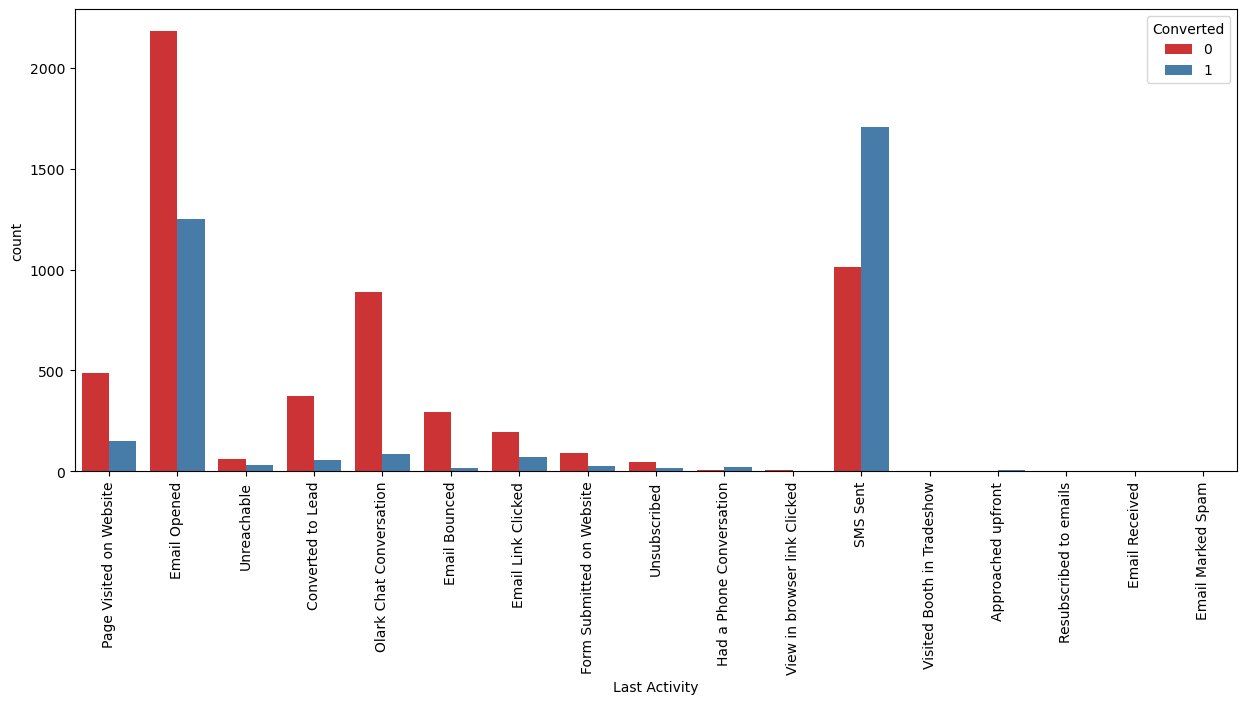

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [112]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                            'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

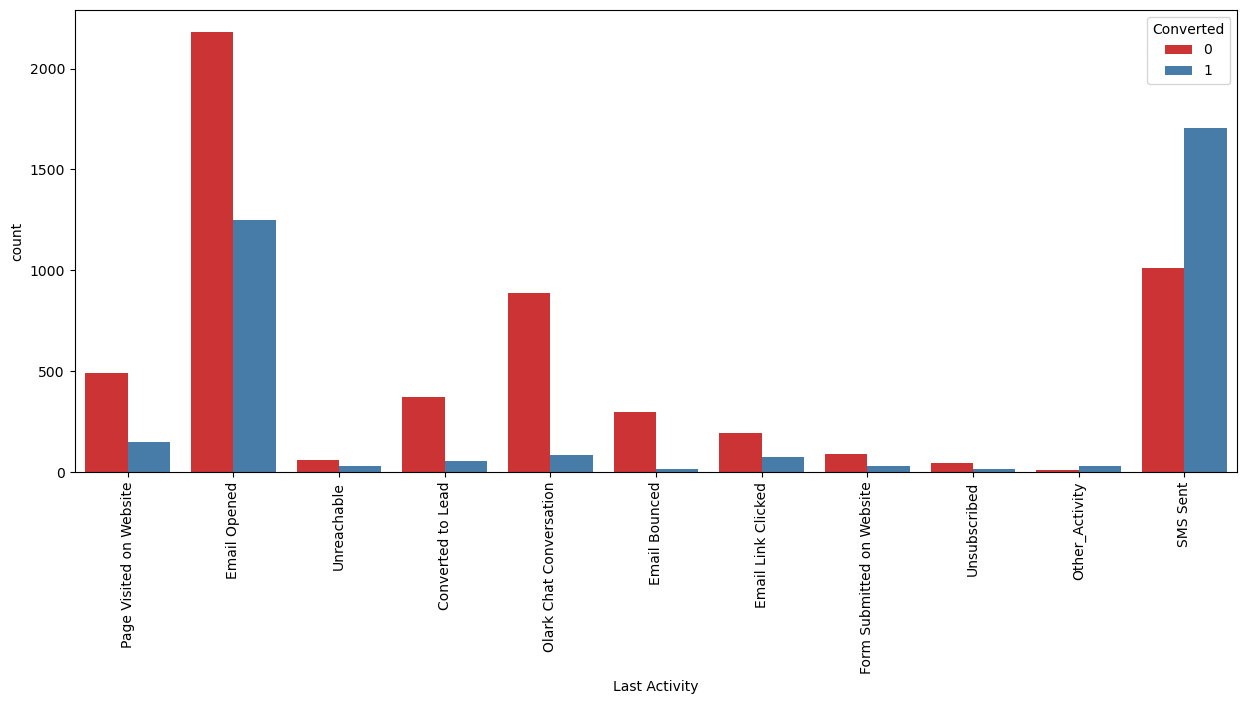

In [113]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most of the lead have their Email opened as their last activity.
    - Conversion rate for leads with last activity as SMS Sent is almost 60%.

10) Country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

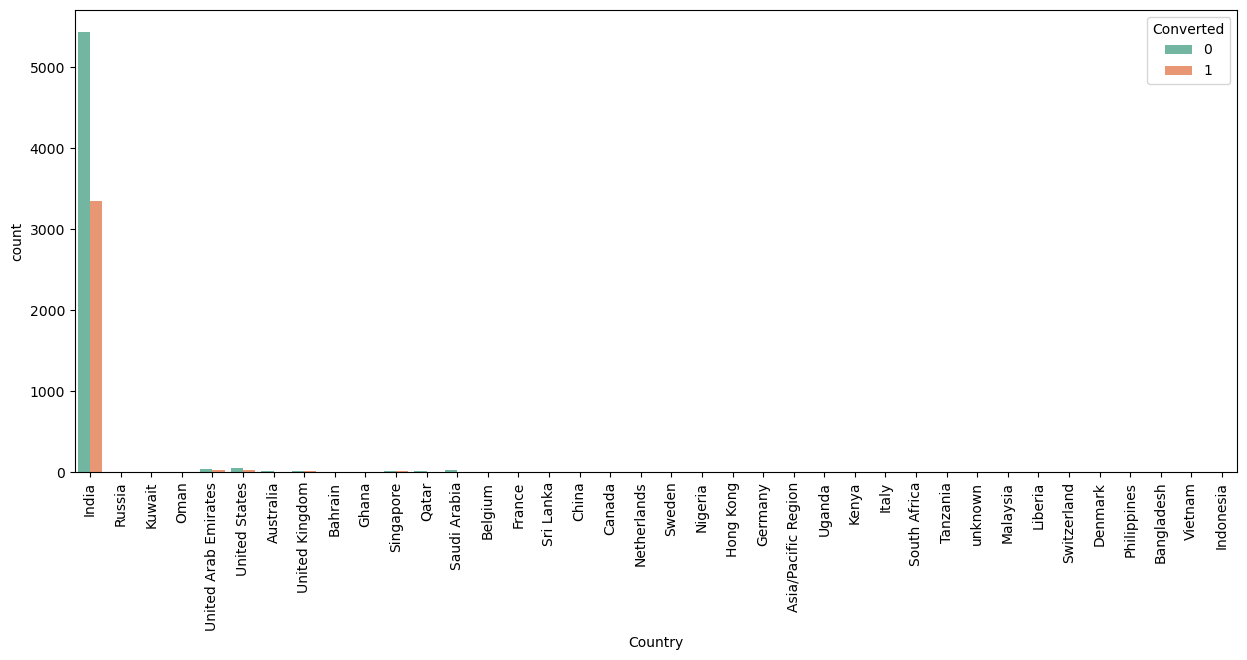

In [116]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
Most values are 'India' no such inference can be drawn

11) Specialization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

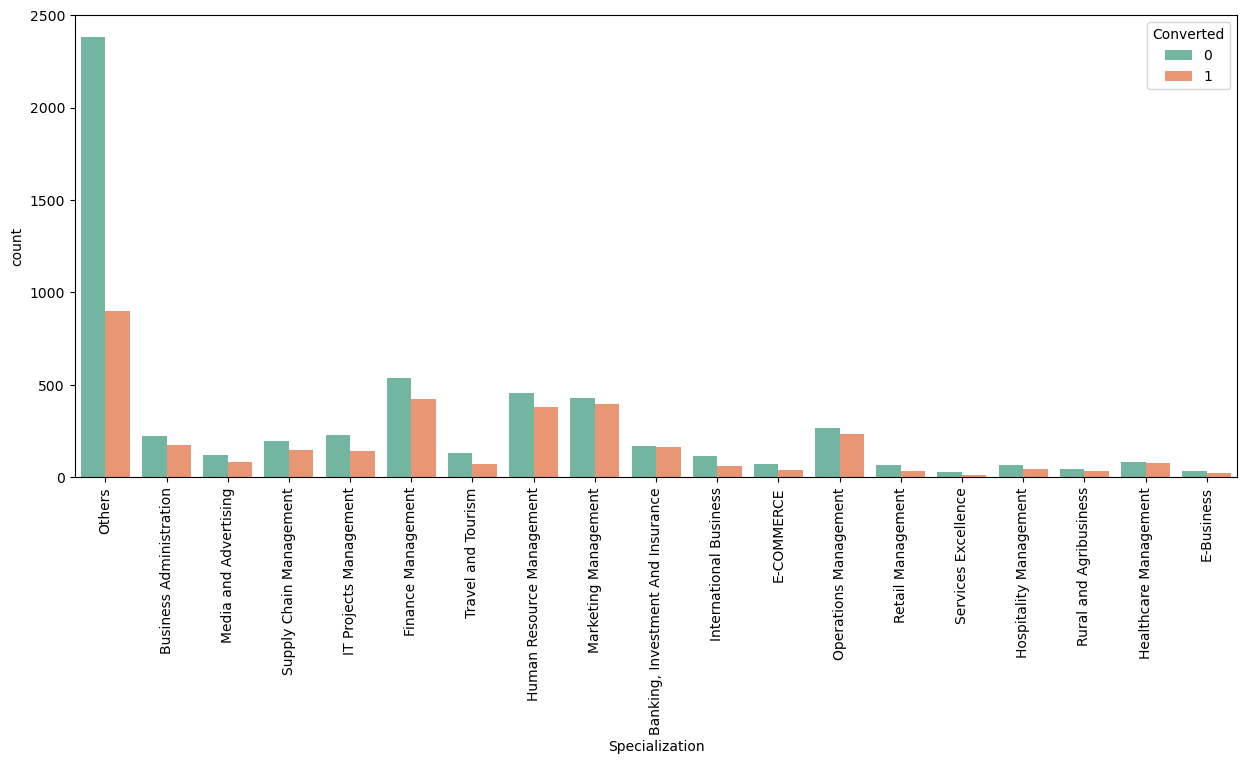

In [119]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Focus should be more on the Specialization with high conversion rate.

12) What is your current occupation

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

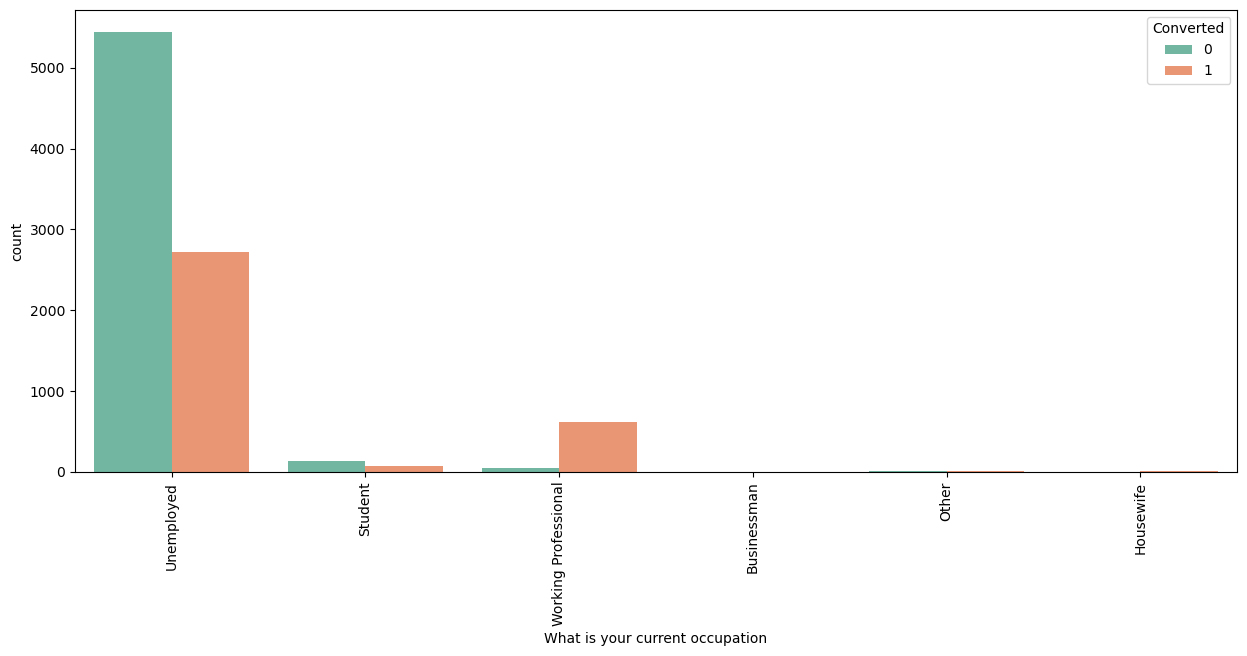

In [122]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    1. Working Professionals going for the course have high chances of joining it.
    2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.


13) Search 

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

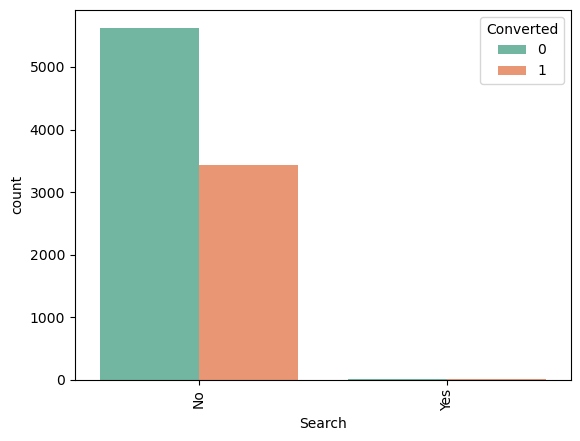

In [125]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter.

14) Magazine

([0], [Text(0, 0, 'No')])

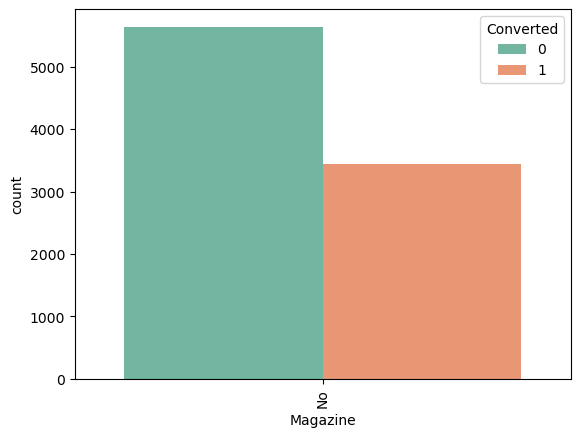

In [128]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter

15) Newspaper Article
    

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

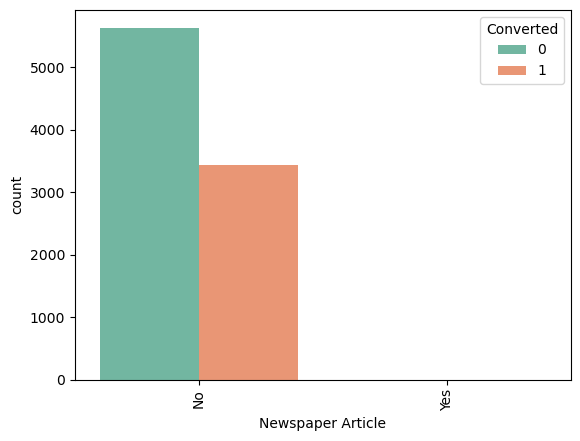

In [131]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

16) X Education Forums

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

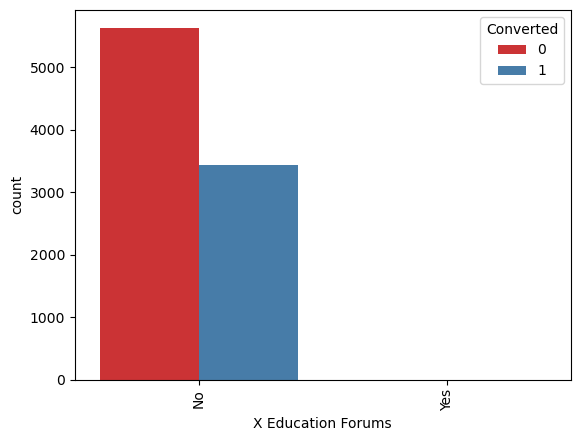

In [133]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference 
    - Most entries are 'No'. No Inference can be drawn with this parameter.

17) Newspaper

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

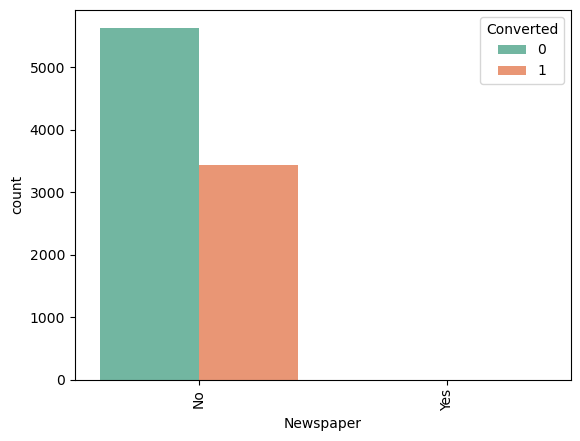

In [136]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter.


18) Digital Advertisement

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

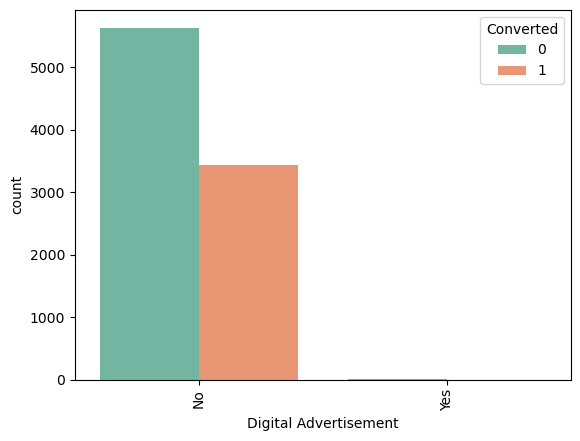

In [139]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter

19) Through Recommendations

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

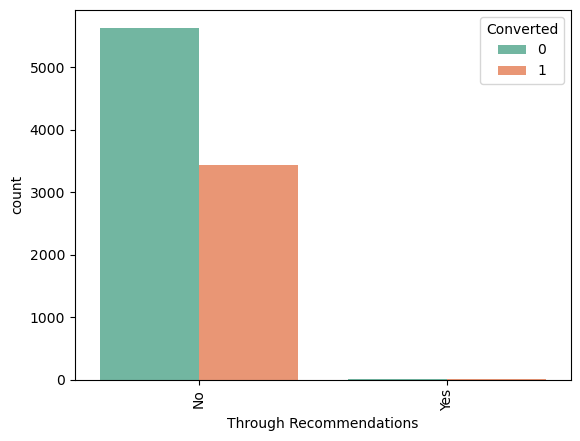

In [142]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter

20) Receive More Updates About Our Courses

([0], [Text(0, 0, 'No')])

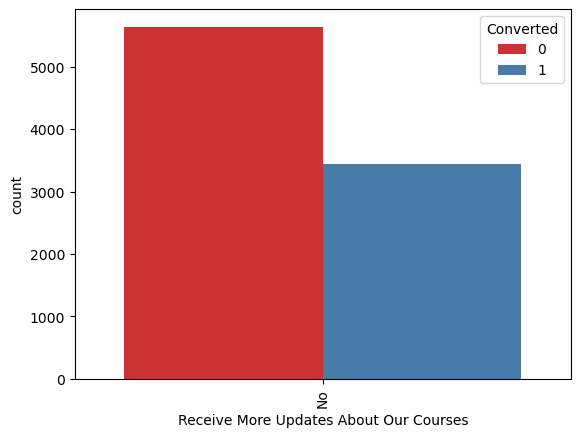

In [145]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter.

21) Tags

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0,

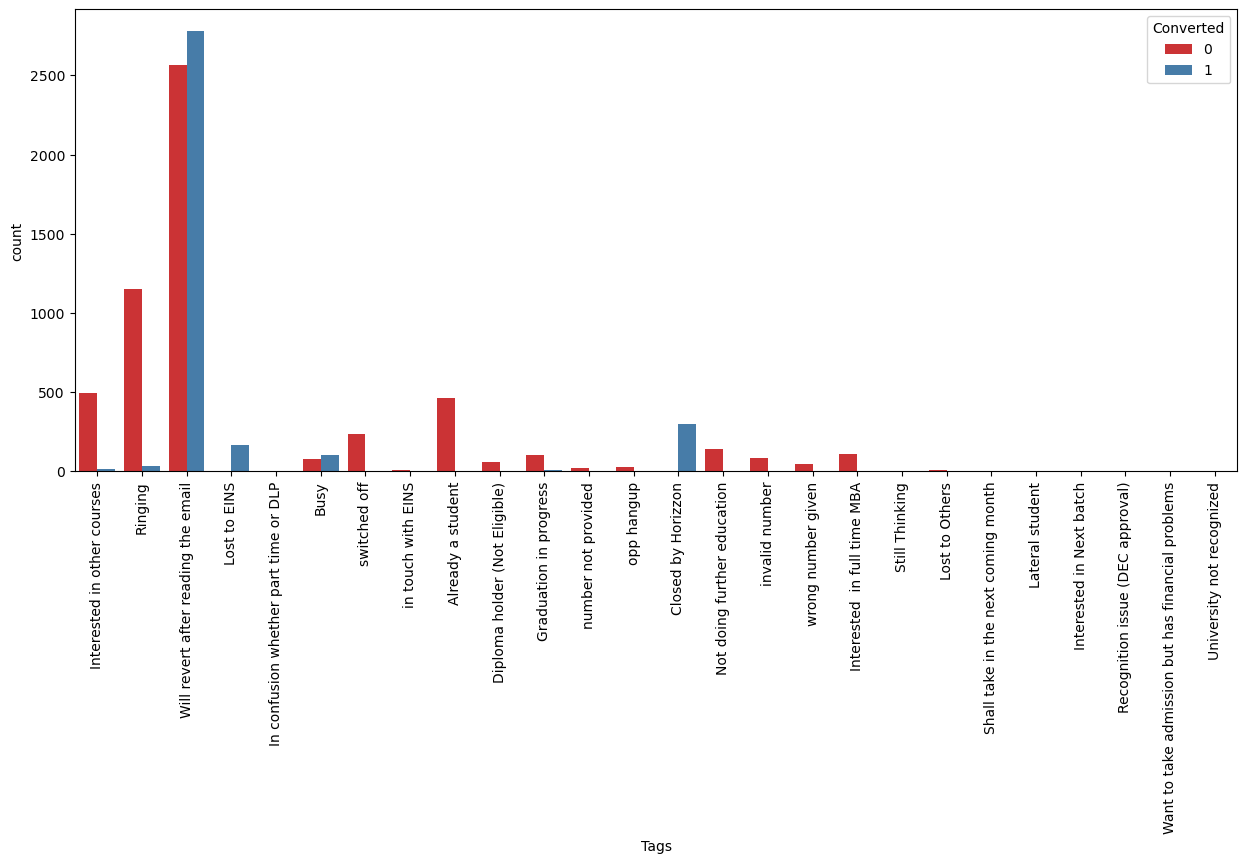

In [148]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we 
    will need to remove this column before building the model

22) Update me on Supply Chain Content

([0], [Text(0, 0, 'No')])

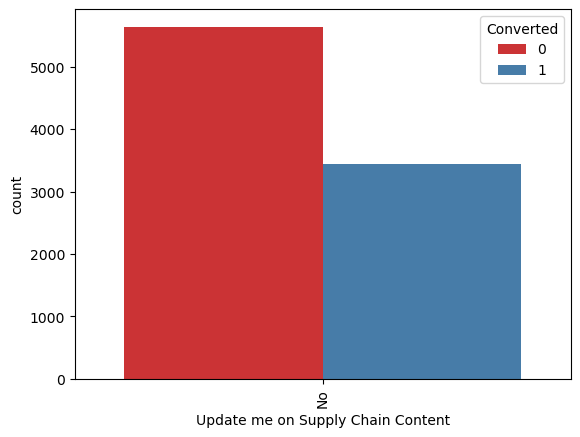

In [151]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter

23) Get updates on DM Content

([0], [Text(0, 0, 'No')])

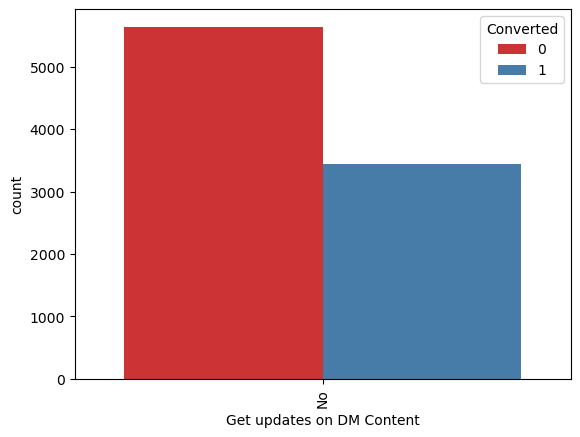

In [154]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter

24) City

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Mumabi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Metro Cities'),
  Text(4, 0, 'Other Cities'),
  Text(5, 0, 'Other Cities of Maharashtra'),
  Text(6, 0, 'Tier II Cities')])

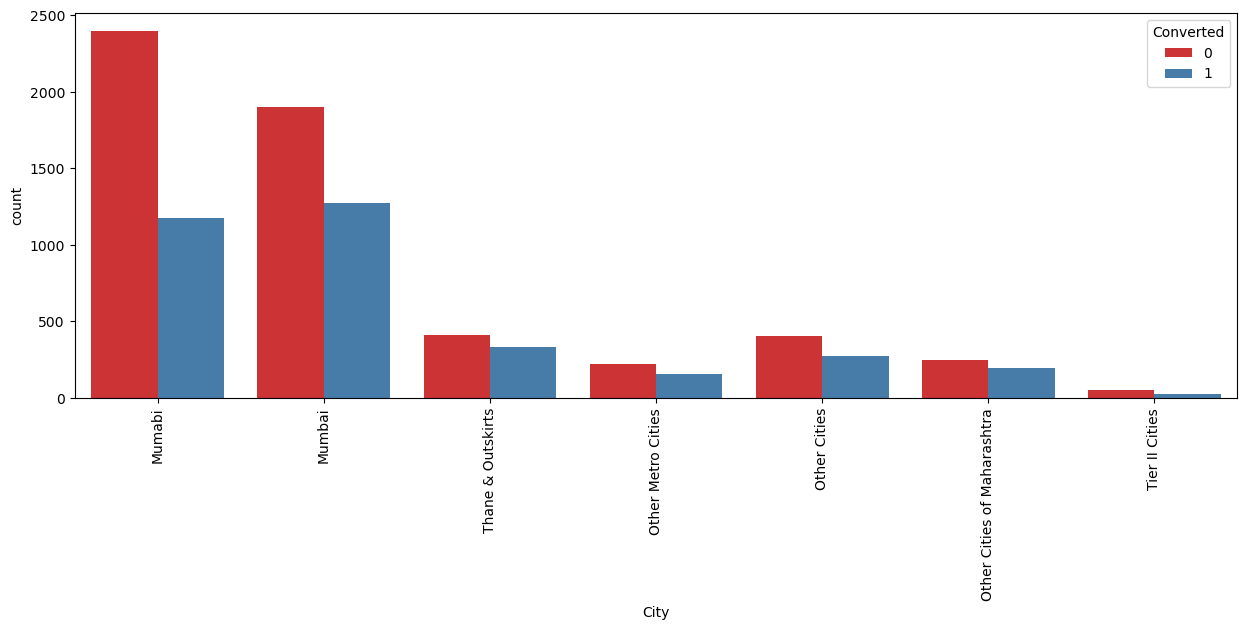

In [157]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most leads are from mumbai with around 50% conversion rate.

25) I agree to pay the amount through cheque

([0], [Text(0, 0, 'No')])

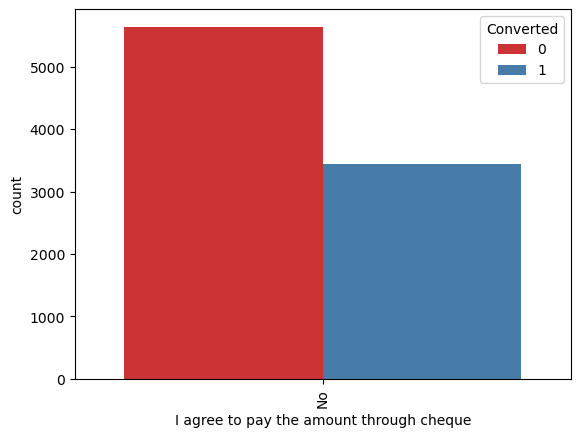

In [160]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter.

26) A free copy of Mastering The Interview

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

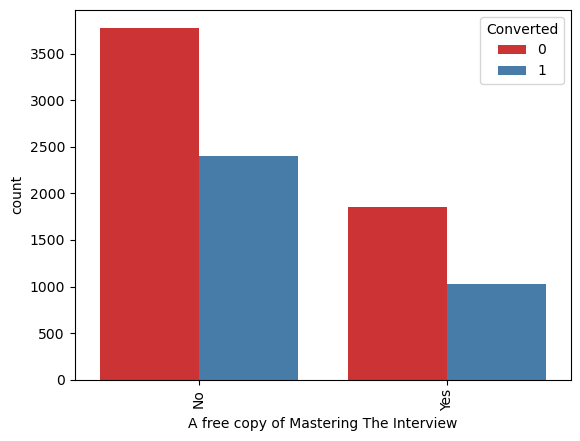

In [163]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Inference
    - Most entries are 'No'. No Inference can be drawn with this parameter.

27) Last Notable Activity

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

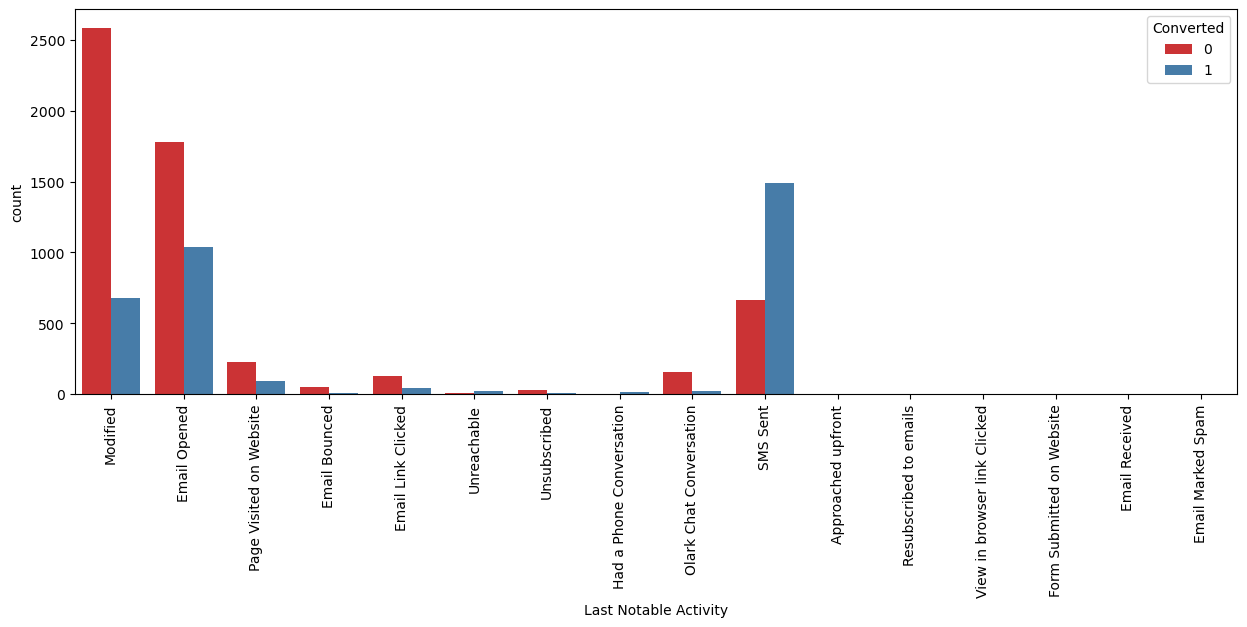

In [166]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Results
    - Based on the univariate analysis we have seen that many columns are not adding any information to the model, 
    hence we can drop them for further analysis

In [168]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [169]:
lead_data.shape

(9074, 14)

In [170]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

#### Data Preparation

1) Converting binary variables (Yes/No) to 1/0

In [173]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

2) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

 Creating a dummy variable for the categorical variables and dropping the first one.

In [176]:
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True, dtype=int)

In [177]:
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [178]:
# Concatenating the dummy_data to the lead_data dataframe


In [179]:
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


Dropping the columns for which dummies were created

In [181]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [182]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


3) Splitting the data into train and test set

In [184]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [185]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [186]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

4) Scaling the features

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [189]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

It's clear that we have ~ 38% lead conversion rate 

Feature Selection Using RFE

In [192]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)           
rfe = rfe.fit(X_train, y_train)

In [193]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False])

In [194]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),


In [195]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model Building 

Assessing the model with StatsModels 

Model-1

In [199]:
import statsmodels.api as sm 

In [200]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.6
Date:                Tue, 18 Mar 2025   Deviance:                       5163.2
Time:                        21:36:43   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2957      0.244      1.210      0.226      -0.183       0.775
Do Not Email                                            -1.6977      0.190     -8.919      0.000      -2.071      -1.325
Total Time Spent on Website                              1.1078      0.041     27.173      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1324      0.129     -8.765      0.000      -1.386      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9816      0.478      2.055      0.040       0.045       1.918
Lead Source_Olark Chat                                   1.1267      0.124      9.078      0.000       0.883       1.370
Lead Source_Reference                                    1.8425      0.932      1.977      0.048       0.016       3.669
Lead Source_Welingak Website                             4.4175      1.162      3.802      0.000       2.140       6.695
Last Activity_Olark Chat Conversation                   -1.0574      0.173     -6.108      0.000      -1.397      -0.718
Last Activity_Other_Activity                             1.7530      0.533      3.289      0.001       0.708       2.798
Last Activity_SMS Sent                                   0.7692      0.157      4.908      0.000       0.462       1.076
Last Activity_Unsubscribed                               1.4489      0.480      3.019      0.003       0.508       2.390
Specialization_Others                                   -1.1469      0.126     -9.120      0.000      -1.393      -0.900
What is your current occupation_Housewife               22.2965   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Unemployed              -0.5238      0.217     -2.414      0.016      -0.949      -0.098
What is your current occupation_Working Professional     2.0950      0.286      7.323      0.000       1.534       2.656
Last Notable Activity_Had a Phone Conversation           1.6042      1.222      1.313      0.189      -0.791       3.999
Last Notable Activity_Modified                          -0.6337      0.097     -6.527      0.000      -0.824      -0.443
Last Notable Activity_SMS Sent                           0.7470      0.177      4.211      0.000       0.399       1.095
Last Notable Activity_Unreachable                        1.6470      0.476      3.462      0.001       0.715       2.579
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [202]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

Model-2

In [204]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.8
Date:                Tue, 18 Mar 2025   Deviance:                       5169.6
Time:                        21:36:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3805      0.240      1.586      0.113      -0.090       0.851
Do Not Email                                            -1.7004      0.190     -8.934      0.000      -2.073      -1.327
Total Time Spent on Website                              1.1070      0.041     27.178      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1317      0.129     -8.767      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9801      0.478      2.052      0.040       0.044       1.916
Lead Source_Olark Chat                                   1.1243      0.124      9.061      0.000       0.881       1.367
Lead Source_Reference                                    1.8504      0.932      1.986      0.047       0.024       3.677
Lead Source_Welingak Website                             4.4184      1.162      3.803      0.000       2.141       6.696
Last Activity_Olark Chat Conversation                   -1.0588      0.173     -6.115      0.000      -1.398      -0.719
Last Activity_Other_Activity                             1.7546      0.533      3.291      0.001       0.710       2.800
Last Activity_SMS Sent                                   0.7700      0.157      4.913      0.000       0.463       1.077
Last Activity_Unsubscribed                               1.4503      0.480      3.022      0.003       0.510       2.391
Specialization_Others                                   -1.1490      0.126     -9.143      0.000      -1.395      -0.903
What is your current occupation_Unemployed              -0.6061      0.212     -2.858      0.004      -1.022      -0.190
What is your current occupation_Working Professional     2.0118      0.282      7.127      0.000       1.458       2.565
Last Notable Activity_Had a Phone Conversation           1.5992      1.222      1.309      0.191      -0.796       3.994
Last Notable Activity_Modified                          -0.6369      0.097     -6.565      0.000      -0.827      -0.447
Last Notable Activity_SMS Sent                           0.7434      0.177      4.191      0.000       0.396       1.091
Last Notable Activity_Unreachable                        1.6440      0.476      3.455      0.001       0.711       2.577
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [206]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

Model-3

In [208]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Tue, 18 Mar 2025   Deviance:                       5171.6
Time:                        21:36:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3851      0.240      1.605      0.108      -0.085       0.855
Do Not Email                                            -1.7034      0.191     -8.936      0.000      -2.077      -1.330
Total Time Spent on Website                              1.1059      0.041     27.161      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1320      0.129     -8.772      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5400      0.908      1.695      0.090      -0.240       3.320
Lead Origin_Lead Import                                  0.9771      0.478      2.045      0.041       0.041       1.914
Lead Source_Olark Chat                                   1.1214      0.124      9.037      0.000       0.878       1.365
Lead Source_Reference                                    1.8487      0.932      1.984      0.047       0.022       3.675
Lead Source_Welingak Website                             4.4197      1.162      3.804      0.000       2.142       6.697
Last Activity_Olark Chat Conversation                   -1.0516      0.173     -6.075      0.000      -1.391      -0.712
Last Activity_Other_Activity                             2.1650      0.459      4.714      0.000       1.265       3.065
Last Activity_SMS Sent                                   0.7774      0.157      4.962      0.000       0.470       1.085
Last Activity_Unsubscribed                               1.4520      0.480      3.025      0.002       0.511       2.393
Specialization_Others                                   -1.1534      0.126     -9.179      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6051      0.212     -2.852      0.004      -1.021      -0.189
What is your current occupation_Working Professional     2.0084      0.282      7.114      0.000       1.455       2.562
Last Notable Activity_Modified                          -0.6472      0.097     -6.683      0.000      -0.837      -0.457
Last Notable Activity_SMS Sent                           0.7329      0.177      4.135      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6401      0.476      3.447      0.001       0.708       2.573
========================================================================================================================
"""

In [209]:
col1 = col1.drop('Lead Origin_Lead Add Form')

Model-4

In [211]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.4
Date:                Tue, 18 Mar 2025   Deviance:                       5174.8
Time:                        21:36:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4017      0.240      1.675      0.094      -0.068       0.872
Do Not Email                                            -1.7052      0.191     -8.945      0.000      -2.079      -1.332
Total Time Spent on Website                              1.1038      0.041     27.153      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1502      0.129     -8.935      0.000      -1.402      -0.898
Lead Origin_Lead Import                                  0.9609      0.478      2.010      0.044       0.024       1.898
Lead Source_Olark Chat                                   1.1144      0.124      9.000      0.000       0.872       1.357
Lead Source_Reference                                    3.3740      0.243     13.878      0.000       2.898       3.851
Lead Source_Welingak Website                             5.9508      0.732      8.133      0.000       4.517       7.385
Last Activity_Olark Chat Conversation                   -1.0563      0.173     -6.104      0.000      -1.396      -0.717
Last Activity_Other_Activity                             2.1606      0.459      4.705      0.000       1.261       3.061
Last Activity_SMS Sent                                   0.7744      0.157      4.944      0.000       0.467       1.081
Last Activity_Unsubscribed                               1.4506      0.480      3.023      0.003       0.510       2.391
Specialization_Others                                   -1.1653      0.126     -9.282      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.6023      0.212     -2.839      0.005      -1.018      -0.186
What is your current occupation_Working Professional     2.0080      0.282      7.111      0.000       1.455       2.561
Last Notable Activity_Modified                          -0.6466      0.097     -6.681      0.000      -0.836      -0.457
Last Notable Activity_SMS Sent                           0.7368      0.177      4.159      0.000       0.390       1.084
Last Notable Activity_Unreachable                        1.6358      0.476      3.438      0.001       0.703       2.568
========================================================================================================================
"""

Checking for VIF values: 

In [213]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.81
15,Last Notable Activity_SMS Sent,6.48
9,Last Activity_SMS Sent,6.26
2,Lead Origin_Landing Page Submission,5.75
11,Specialization_Others,4.00
14,Last Notable Activity_Modified,2.47
4,Lead Source_Olark Chat,2.24
13,What is your current occupation_Working Profes...,1.67
7,Last Activity_Olark Chat Conversation,1.63
5,Lead Source_Reference,1.46


In [214]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

Model-5

In [216]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Tue, 18 Mar 2025   Deviance:                       5182.6
Time:                        21:36:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1714      0.128     -1.336      0.182      -0.423       0.080
Do Not Email                                            -1.7006      0.191     -8.913      0.000      -2.075      -1.327
Total Time Spent on Website                              1.1038      0.041     27.169      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1542      0.129     -8.960      0.000      -1.407      -0.902
Lead Origin_Lead Import                                  0.9417      0.478      1.970      0.049       0.005       1.878
Lead Source_Olark Chat                                   1.1201      0.124      9.045      0.000       0.877       1.363
Lead Source_Reference                                    3.3857      0.243     13.945      0.000       2.910       3.861
Lead Source_Welingak Website                             5.9420      0.732      8.122      0.000       4.508       7.376
Last Activity_Olark Chat Conversation                   -1.0474      0.173     -6.060      0.000      -1.386      -0.709
Last Activity_Other_Activity                             2.1424      0.459      4.663      0.000       1.242       3.043
Last Activity_SMS Sent                                   0.7623      0.156      4.874      0.000       0.456       1.069
Last Activity_Unsubscribed                               1.4243      0.480      2.968      0.003       0.484       2.365
Specialization_Others                                   -1.1772      0.126     -9.362      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.5908      0.194     13.327      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6545      0.097     -6.764      0.000      -0.844      -0.465
Last Notable Activity_SMS Sent                           0.7326      0.177      4.139      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6195      0.474      3.414      0.001       0.690       2.549
========================================================================================================================
"""

In [217]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

Model-6

In [219]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 18 Mar 2025   Deviance:                       5186.2
Time:                        21:36:44   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1281      0.127     -1.012      0.312      -0.376       0.120
Do Not Email                                            -1.7017      0.191     -8.922      0.000      -2.076      -1.328
Total Time Spent on Website                              1.0961      0.040     27.161      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1915      0.128     -9.333      0.000      -1.442      -0.941
Lead Source_Olark Chat                                   1.0930      0.123      8.897      0.000       0.852       1.334
Lead Source_Reference                                    3.3495      0.242     13.839      0.000       2.875       3.824
Lead Source_Welingak Website                             5.9157      0.731      8.088      0.000       4.482       7.349
Last Activity_Olark Chat Conversation                   -1.0509      0.173     -6.081      0.000      -1.390      -0.712
Last Activity_Other_Activity                             2.1337      0.459      4.648      0.000       1.234       3.033
Last Activity_SMS Sent                                   0.7691      0.156      4.920      0.000       0.463       1.076
Last Activity_Unsubscribed                               1.4192      0.479      2.961      0.003       0.480       2.359
Specialization_Others                                   -1.1999      0.126     -9.553      0.000      -1.446      -0.954
What is your current occupation_Working Professional     2.5913      0.194     13.336      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6587      0.097     -6.812      0.000      -0.848      -0.469
Last Notable Activity_SMS Sent                           0.7200      0.177      4.072      0.000       0.373       1.066
Last Notable Activity_Unreachable                        1.6073      0.474      3.389      0.001       0.678       2.537
========================================================================================================================
"""

Checking for VIF values: 

In [221]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.25
12,Last Notable Activity_Modified,2.35
10,Specialization_Others,2.21
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.79
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [222]:
# Dropping the column  'Last Notable Activity_SMS Sent' because it has high Pvalue
col1 = col1.drop('Last Notable Activity_SMS Sent')

Model-7

In [224]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 18 Mar 2025   Deviance:                       5203.0
Time:                        21:36:44   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

Checking for VIF values:

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [227]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

Model-8

In [229]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Tue, 18 Mar 2025   Deviance:                       5214.0
Time:                        21:36:44   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0474      0.125     -0.378      0.705      -0.293       0.198
Do Not Email                                            -1.6797      0.191     -8.807      0.000      -2.053      -1.306
Total Time Spent on Website                              1.0943      0.040     27.185      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.1910      0.128     -9.338      0.000      -1.441      -0.941
Lead Source_Olark Chat                                   1.0811      0.122      8.837      0.000       0.841       1.321
Lead Source_Reference                                    3.3281      0.242     13.772      0.000       2.854       3.802
Lead Source_Welingak Website                             5.8458      0.729      8.015      0.000       4.416       7.275
Last Activity_Olark Chat Conversation                   -0.9554      0.171     -5.574      0.000      -1.291      -0.619
Last Activity_Other_Activity                             2.1868      0.463      4.726      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3095      0.075     17.435      0.000       1.162       1.457
Last Activity_Unsubscribed                               1.3641      0.482      2.830      0.005       0.419       2.309
Specialization_Others                                   -1.2017      0.126     -9.571      0.000      -1.448      -0.956
What is your current occupation_Working Professional     2.6075      0.194     13.410      0.000       2.226       2.989
Last Notable Activity_Modified                          -0.8936      0.081    -11.002      0.000      -1.053      -0.734
========================================================================================================================
"""

Checking for VIF values:

In [231]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 13 variables in our final model.

Making Prediction on the Train Set 

In [234]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.195642
1012    0.108782
9226    0.326407
4750    0.866384
7987    0.799849
1281    0.745412
2880    0.099499
4971    0.965955
7536    0.853269
1248    0.770418
dtype: float64

In [235]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19564211, 0.10878227, 0.32640737, 0.86638384, 0.79984858,
       0.74541236, 0.09949947, 0.96595542, 0.85326938, 0.77041836])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [237]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.195642,3009
1,0,0.108782,1012
2,0,0.326407,9226
3,1,0.866384,4750
4,1,0.799849,7987


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [240]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.195642,3009,0
1,0,0.108782,1012,0
2,0,0.326407,9226,0
3,1,0.866384,4750,1
4,1,0.799849,7987,1


Let's Make the Confusion Matrix

In [242]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 716 1730]]


In [243]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [244]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8170366871358841


Metrics beyond simply accuracy

In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7072771872444807


In [248]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.885787451984635


In [249]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11421254801536491


In [250]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7950367647058824


In [251]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.828502994011976


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.


We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, 
this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve

#### Plotting the ROC Curve 

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [256]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [257]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

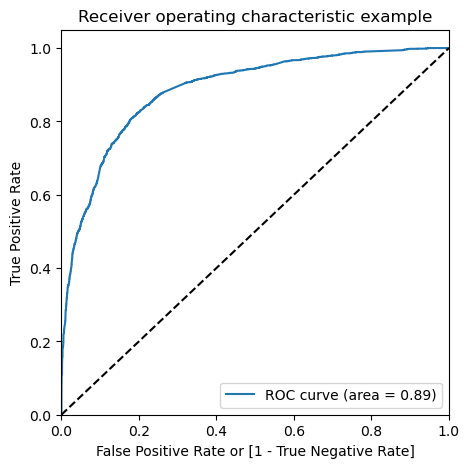

In [258]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

Finding Optimal Cutoff Point


Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [262]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0


In [263]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.587781  0.973017  0.346479
0.2   0.2  0.749173  0.915372  0.645070
0.3   0.3  0.800976  0.849959  0.770294
0.4   0.4  0.816092  0.773508  0.842766
0.5   0.5  0.817037  0.707277  0.885787
0.6   0.6  0.797512  0.600164  0.921127
0.7   0.7  0.786490  0.529436  0.947503
0.8   0.8  0.761612  0.425184  0.972343
0.9   0.9  0.721619  0.296811  0.987708


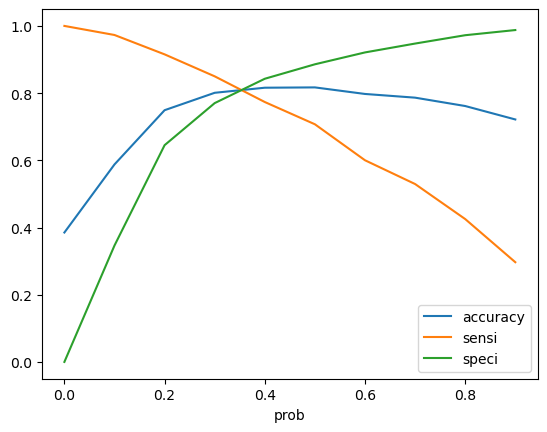

In [264]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [266]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1


Assigning Lead Score to the Training data

In [268]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


#### Model Evaluation

In [270]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8110533774208786


In [271]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3148,  757],
       [ 443, 2003]], dtype=int64)

In [272]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [273]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8188879803761243


In [274]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.806145966709347


In [275]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.193854033290653


In [276]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7257246376811595


In [277]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8766360345307713


#### Precision and Recall

- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [280]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 716, 1730]], dtype=int64)

In [281]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7950367647058824


In [282]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7072771872444807


Using sklearn utilities for the same

In [284]:
from sklearn.metrics import precision_score, recall_score


In [285]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7950367647058824


In [286]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Recall : 0.7072771872444807


Precision and recall tradeoff

In [288]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [289]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

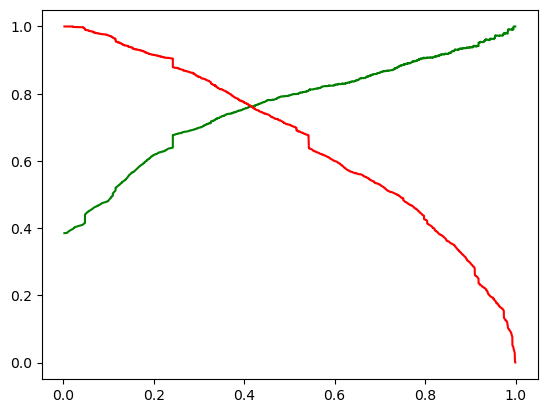

In [290]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall

#### Making predictions on the test set

Scaling the test data

In [294]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [295]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [296]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129393
1490    0.968762
7936    0.111751
4216    0.804505
3830    0.132210
1800    0.633964
6507    0.344721
4821    0.301208
4223    0.918045
4714    0.326407
dtype: float64

In [297]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [298]:
# Let's see the head
y_pred_1.head()

,0
3271,0.129393
1490,0.968762
7936,0.111751
4216,0.804505
3830,0.132210


In [299]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [300]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [301]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [302]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [303]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129393
1,1,1490,0.968762
2,0,7936,0.111751
3,1,4216,0.804505
4,0,3830,0.132210


In [304]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [305]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [306]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.129393
1,1490,1,0.968762
2,7936,0,0.111751
3,4216,1,0.804505
4,3830,0,0.132210


In [307]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [308]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.129393,0
1,1490,1,0.968762,1
2,7936,0,0.111751,0
3,4216,1,0.804505,1
4,3830,0,0.132210,0


In [309]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8042600073448403


In [310]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1394,  340],
       [ 193,  796]], dtype=int64)

In [311]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [312]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [313]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.803921568627451


Assigning Lead Score to the Testing data

In [315]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.129393,0,13
1,1490,1,0.968762,1,97
2,7936,0,0.111751,0,11
3,4216,1,0.804505,1,80
4,3830,0,0.132210,0,13


#### Observations:

After running the model on the Test Data , we obtain:

    - Accuracy : 80.4 %
    - Sensitivity : 80.4 %
    - Specificity : 80.4 %

#### Results: 

1) Comparing the values obtained for Train & Test:

Train Data:
    - Accuracy : 81.7 %
    - Sensitivity : 81.88 %
    - Specificity : 80.69 %

Test Data:
    - Accuracy : 80.4 %
    - Sensitivity : 80.48 %
    - Specificity : 80.4 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%

2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [325]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968762,1,97
8,4223,1,0.918045,1,92
16,1946,1,0.924785,1,92
21,2461,1,0.992852,1,99
23,5822,1,0.998025,1,100
...,...,...,...,...,...
2694,1566,1,0.947264,1,95
2699,6461,1,0.961690,1,96
2703,5741,1,0.908795,1,91
2715,6299,1,0.872460,1,87


So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [327]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

3) Finding out the Important Features from our final model:

In [329]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.845756
Lead Source_Reference                                   3.328115
What is your current occupation_Working Professional    2.607500
Last Activity_Other_Activity                            2.186759
Last Activity_Unsubscribed                              1.364140
Last Activity_SMS Sent                                  1.309507
Total Time Spent on Website                             1.094285
Lead Source_Olark Chat                                  1.081150
const                                                  -0.047402
Last Notable Activity_Modified                         -0.893587
Last Activity_Olark Chat Conversation                  -0.955424
Lead Origin_Landing Page Submission                    -1.190991
Specialization_Others                                  -1.201711
Do Not Email                                           -1.679670
dtype: float64

#### Recommendations:

- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.